# Uitwerkingen opgaven data-analyse

## Opgave 1.3

We maken hier gebruik van de error function, gedefinieerd in `scipy.special.erf`. Er is ook een complementaire error function, gedefinieerd als $\mathrm{erfc} = 1 - \mathrm{erf}$. Vergeet niet de factor $\sqrt{2}$, aangezien $\mathrm{erf}$ een vereenvoudigde functie is, en het argument nog omgerekend moet worden.

De waarschijnlijkheid dat een waarde méér dan $1.23\sigma$ van het gemiddelde afligt is gegeven door:

In [1]:
from math import sqrt
from scipy.special import erf, erfc

In [2]:
erfc(1.23 / sqrt(2))

0.21869710485138394

De waarschijnlijkheid dat een waarde méér dan $2.43\sigma$ *boven* het gemiddelde ligt is gegeven door:

In [3]:
erfc(2.43 / sqrt(2)) / 2

0.0075494114163092065

De waarschijnlijkheid dat een waarde meer dan $0.5\sigma$, maar minder dan $1.5\sigma$ van het gemiddelde verwijderd is, wordt gegeven door:

In [4]:
erf(1.5 / sqrt(2)) - erf(.5 / sqrt(2))

0.4834606749142577

We willen weten binnen hoeveel standaarddeviaties van het gemiddelde de waarschijnlijkheid dat een waarde gevonden wordt gelijk is aan $50\,\%$. Gebruik hiervoor de inverse error function `erfinv`. Vergeet de factor $\sqrt{2}$ niet!

In [5]:
from scipy.special import erfinv

In [6]:
erfinv(.5) * sqrt(2)

0.67448975019608171

## Opgave 1.4

We maken gebruik van pandas, een python data-analyse pakket. We importeren de datafile:

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('10-metingen.txt')

In [9]:
print(data)

    x
0  73
1  79
2  69
3  74
4  68
5  72
6  72
7  75
8  60
9  76


...en bekijken wat statistieken:

In [10]:
data.describe()

,x
count,10.000000
mean,71.800000
std,5.245104
min,60.000000
25%,69.750000
50%,72.500000
75%,74.750000
max,79.000000


De standaarddeviatie van het gemiddelde is:

In [11]:
x = data.x
x.std() / sqrt(x.count())

1.6586473739499636

Het resultaat van ons experiment is dus $x = 71.8 \pm 1.7$ of $x = 71.8(17)$.

Voor De kans op een volgende meting met $x\geq 75$ berekenen we eerst hoeveel standaarddeviaties de meting verwijderd is van het gemiddelde. Vervolgens berekenen we de kans op een meting hóger dan dat aantal standaarddeviaties:

In [12]:
dist = 75 - x.mean()
dist_sigma = dist / x.std()
erfc(dist_sigma / sqrt(2)) / 2

0.27090016180692866

## Opgave 1.5

We gaan plotten, en we moeten `matplotlib` vertellen dat we de plots in de notebook willen zien:

In [13]:
%matplotlib inline

We openen de datafile en maken een histogram van $y$:

In [14]:
data = pd.read_csv('80-metingen.txt')
data.describe()

,y
count,80.000000
mean,61.587500
std,16.779051
min,22.000000
25%,49.000000
50%,63.500000
75%,75.000000
max,91.000000


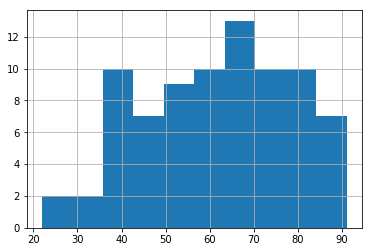

In [15]:
data.y.hist()

Het is best interessant dat dit histogram er heel anders uitziet dan het antwoord uit de uitwerkingen. Dat histogram is gemaakt met Origin, en dat lijkt standaard iets beter op zoek te gaan naar aardige bingrenzen. Niet simpelweg het minimum en het maximum nemen en opdelen, maar afronden op mooie, ronde getallen. Handmatig kan dat in Python. Voor stapgroottes kun je het beste `arange` gebruiken. Let er daarbij wel op dat `arange` niet inclusief is. Het maximum wordt niet meegenomen. Als je dat ietsje groter maakt dan de bingrens, dus 101 i.p.v. 100, dan komt het goed:

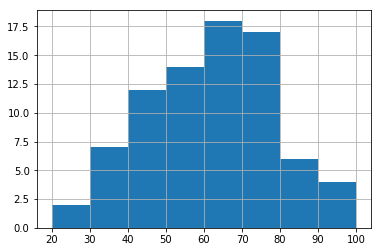

In [16]:
import numpy as np
bins = np.arange(20, 101, 10)
data.y.hist(bins=bins)

Het fitten van een bekende distributie (zie `scipy.stats`) aan de data gaat vrij eenvoudig. Daar heb je niet eens een histogram voor nodig:

In [17]:
from scipy import stats
mean, sigma = stats.norm.fit(data.y)
mean, sigma

(61.587499999999999, 16.673852096921095)

De meest waarschijnlijke distributie heeft een gemiddelde van 61.6 en een standaarddeviatie van 16.7. Je krijgt alleen de distributie, genormeerd, dus als je dat samen met het histogram wilt plotten moet je eerst nog schalen met een factor $N^2 / N_\mathrm{bins}$:

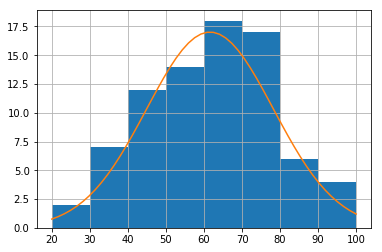

In [18]:
import matplotlib.pyplot as plt

data.y.hist(bins=bins)

scale = data.y.count() ** 2 / len(bins - 1)
x = np.linspace(20, 100, 50)
plt.plot(x, scale * stats.norm.pdf(x, mean, sigma))

Het is dan wellicht interessanter om het histogram weer te geven als waardes met foutenvlaggen. Eerst wil je de waardes van het histogram, zonder te plotten. Dan moet je de middens van de bins berekenen, en dat plotten met de fouten $\sqrt{N}$:

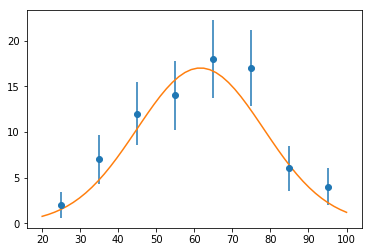

In [19]:
n, _ = np.histogram(data.y, bins=bins)
xbins = (bins[:-1] + bins[1:]) / 2
plt.errorbar(xbins, n, yerr=np.sqrt(n), fmt='o')

plt.plot(x, scale * stats.norm.pdf(x, mean, sigma))

Merk op dat de waardes van de fit iets verschillen van die van Origin, helaas. De volledige code om het laatste plaatje te maken wordt dan:

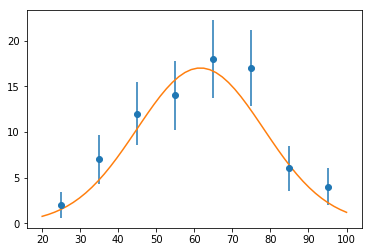

In [20]:
# imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# read datafile
data = pd.read_csv('80-metingen.txt')

# calculate histogram
bins = np.arange(20, 101, 10)
n, _ = np.histogram(data.y, bins=bins)

# plot histogram with bin centers and error bars
xbins = (bins[:-1] + bins[1:]) / 2
plt.errorbar(xbins, n, yerr=np.sqrt(n), fmt='o')

# fit normal distribution to data
mean, sigma = stats.norm.fit(data.y)

# plot the scaled distribution
scale = data.y.count() ** 2 / len(bins - 1)
x = np.linspace(20, 100, 50)
plt.plot(x, scale * stats.norm.pdf(x, mean, sigma))

Dit is wel meer werk dan in Origin, vooral als je nog niet zo handig bent. Zeker ook meer om te onthouden. **Merk op dat de fit gedaan is op de volledige set waarnemingen, dus niet op het histogram. Als er gefit moet worden aan een histogram, of als je een zelf-gedefinieerde functie wilt fitten, dan moet je overstappen naar least-squares fitting.**

We vertrouwen de data wel. De fit gaat door of vlak langs alle foutenvlaggen.